In [1]:
from google.colab import files
iris = files.upload()

Saving iris (2).csv to iris (2).csv


In [2]:
import pandas as pd
data1 = pd.read_csv("iris (2).csv")
df1 = pd.DataFrame(data1)
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

X = df1.drop('species', axis=1)
y = df1['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

rf_default = RandomForestClassifier(random_state=0)
rf_default.fit(X_train, y_train)
y_pred_default = rf_default.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)
print(f"Accuracy with default n_estimators (15): {accuracy_default}")

best_n_estimators = 0
best_accuracy = 0
for n_estimators in range(1, 101):
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=0)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_estimators = n_estimators

print(f"Best accuracy: {best_accuracy} with n_estimators: {best_n_estimators}")


Accuracy with default n_estimators (15): 1.0
Best accuracy: 1.0 with n_estimators: 15


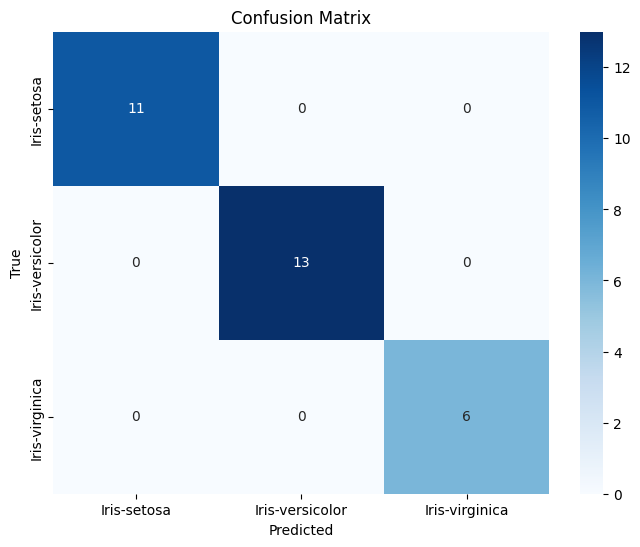

In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_default)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()